In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry.point import Point

import sys
sys.path.append('..')
from utils import merge_on_lat_lon

In [75]:
df_geo = gpd.read_file('../data/malawi/grid/grid.shp')

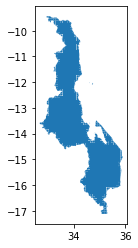

In [76]:
df_geo['geometry'].plot()

In [77]:
metric = 'consumption'

In [78]:
preds = pd.read_csv(f'../results/malawi/ridge_{metric}/predictions.csv')

In [79]:
preds

,centroid_lat,centroid_lon,predicted_consumption_pc
0,-17.083471,35.291291,3866.381213
1,-17.083036,35.142291,1489.973121
2,-17.082668,35.231750,3017.756208
3,-17.068863,35.084458,1396.099027
4,-17.013450,35.078743,1549.717568
...,...,...,...
1198,-9.509490,33.326193,1395.339455
1199,-9.509371,33.257111,2306.405471
1200,-9.508237,33.160050,1984.603675
1201,-9.486041,33.073519,1991.548988


In [80]:
df_geo['centroid'] = df_geo['geometry'].centroid

In [81]:
df_geo['centroid_lat'] = df_geo['centroid'].apply(lambda point: point.y)
df_geo['centroid_lon'] = df_geo['centroid'].apply(lambda point: point.x)

In [82]:
df_geo = merge_on_lat_lon(df_geo, preds, keys=['centroid_lat', 'centroid_lon'])

In [83]:
df_geo.head()

,Shape_Leng,Shape_Area,ADM0_EN,ADM0_PCODE,ADM0_REF,ADM0ALT1EN,ADM0ALT2EN,date,validOn,validTo,geometry,centroid,centroid_lat,centroid_lon,predicted_consumption_pc
0,31.909743,8.001588,Malawi,MW,None,None,None,2018-09-03,2018-10-16,None,"MULTIPOLYGON (((32.76144 -13.56848, 32.76144 -...",POINT (32.71033 -13.57114),-13.571136,32.710327,2621.612080
1,31.909743,8.001588,Malawi,MW,None,None,None,2018-09-03,2018-10-16,None,"POLYGON ((32.69409 -13.57524, 32.72029 -13.575...",POINT (32.72372 -13.60814),-13.608144,32.723719,2307.384377
2,31.909743,8.001588,Malawi,MW,None,None,None,2018-09-03,2018-10-16,None,"POLYGON ((32.85127 -13.45789, 32.85127 -13.487...",POINT (32.84735 -13.47177),-13.471766,32.847355,1705.541213
3,31.909743,8.001588,Malawi,MW,None,None,None,2018-09-03,2018-10-16,None,"POLYGON ((32.84497 -13.48791, 32.85127 -13.487...",POINT (32.81763 -13.55146),-13.551465,32.817625,1663.271286
4,31.909743,8.001588,Malawi,MW,None,None,None,2018-09-03,2018-10-16,None,"POLYGON ((32.76144 -13.57524, 32.85127 -13.575...",POINT (32.80909 -13.61563),-13.615633,32.809090,2009.376192


In [84]:
df_geo.shape, preds.shape

((1203, 15), (1203, 3))

In [85]:
geometry = df_geo['geometry']

# if prediction is under 0, set to 0
coloring_guide = df_geo[f'predicted_{metric}_pc']
coloring_guide.loc[coloring_guide < 0] = 0

cmap = 'inferno'
vmin = coloring_guide.min()
vmax = coloring_guide.max()

kwargs = {'vmin': vmin,
         'vmax': vmax,
         'cmap': cmap}


/Applications/anaconda3/envs/taddle/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


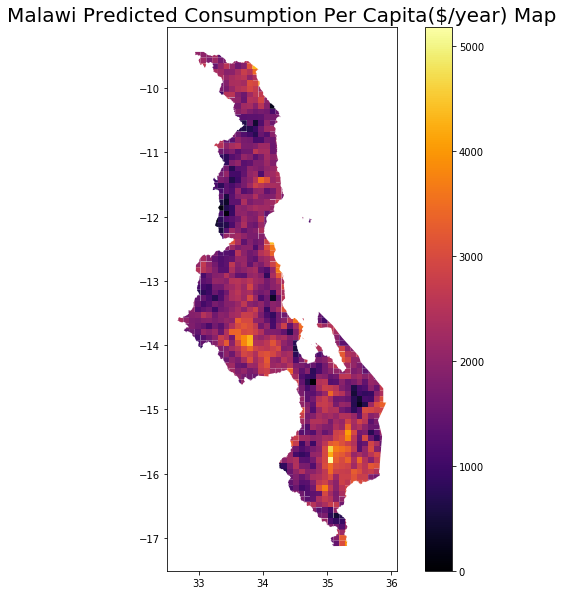

In [86]:
import matplotlib.cm as cm
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect("equal")
norm = colors.Normalize(vmin, vmax)
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
gpd.plotting.plot_polygon_collection(ax, geometry, values=coloring_guide, **kwargs)

units = ''
if metric in ['consumption', 'phone_consumption']:
    units = '($/year)'

label = (metric +' per capita').replace('_', ' ')
ax.set_title(f'Malawi Predicted {label.title() + units} Map', fontsize=20)

plt.savefig(f'../results/malawi/figures/predicted_{metric}_per_capita.png')
plt.show()